In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math

np.random.seed(12345)

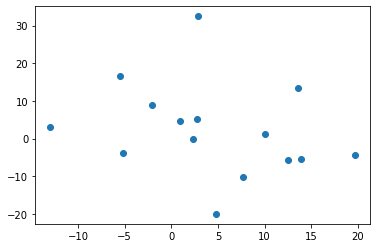

In [2]:
x = np.random.normal(scale=10, size=15)
y = np.random.normal(scale=10, size=15)
plt.scatter(x, y)
plt.show()

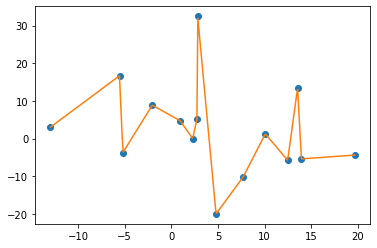

In [3]:
f = interpolate.interp1d(x, y)
new_x = np.arange(min(x), max(x), 0.1)
new_y = f(new_x)
plt.plot(x, y, 'o', new_x, new_y, '-')
plt.show()

# найти как оно работает в github
https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/interpolate.py#L332-L721

In [4]:
# реализовать метод 

# массив x: одинаковые точки идут только подряд
# массив y: размерности такой же что и x
class Krogh:
    def __init__(self, x1: np.ndarray, y1: np.ndarray) -> None:
        
        self.x = x1
        self.n = len(x1)

        c = np.zeros(self.n+1) # массив интерполированных значений [n + 1]
        c[0] = y1[0] # первая точка сохраняется (x[0], y[0])
        p = np.zeros(self.n) # вспомогательный массив для пересчета каждую итерацию
        
        # идем по точкам со 2
        for k in range(1, self.n):
    
            # ищем количество идущих подряд точек перед нашей с такой же абсциссой
            s = 0
            while s + 1 <= k and x1[k - s - 1] == x1[k]:
                s += 1
            
            # заполняем массив интерполяции [0..k-s]
            # первая точка - ордината нашей, уменьшенная в факториал количества точек до нее с такой же абсциссой
            p[0] = y1[k] / float(math.factorial(s))
            
             # идем по всем точкам меньше нашей по оси абсцисс
            for i in range(k-s):
                if x1[i] == x1[k]: # не соблюдено условие входных данных
                    raise RuntimeError('Input x should not contain scattered same values')
                if s == 0: # первая точка из серии - 
                    p[i+1] = (c[i]-p[i])/(x1[i] - x1[k])
                else: # следующие с такой же абсциссой - большая точность
                    p[i+1] = (p[i+1]-p[i])/(x1[i] - x1[k])
            c[k] = p[k-s] # берем первую точку из серии в результирующий массив
        self.c = c

    def __call__(self, x1: np.ndarray) -> np.ndarray:
        pi = 1
        p = np.zeros(len(x1))
        p += self.c[0,np.newaxis] # берем первую точку из c
        for k in range(1, self.n):
            xi = x1 - self.x[k - 1] # i элемент 0
            pi = xi*pi # scalar multiply
            p += pi * self.c[k] # берем остальные точки 
        return p

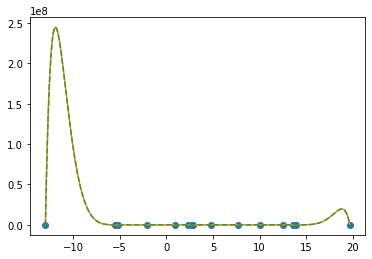

In [5]:
# сравнить собственный метод и библиотечный
my_krogh = Krogh(x, y)
lib_krogh = interpolate.KroghInterpolator(x, y)

plt.plot(x, y, 'o', new_x, my_krogh(new_x), '-', new_x, lib_krogh(new_x), '--')
plt.show()

<h4><b>Вывод:</b> красиво, рисуется на вид так же</h4>